# Problem 1.3

(c) Sketch the graph of $\rho(x)$

$$
    \rho(x) = \sqrt{\frac{\lambda}{\pi}} e^{-\lambda(x-a)^{2}}
$$

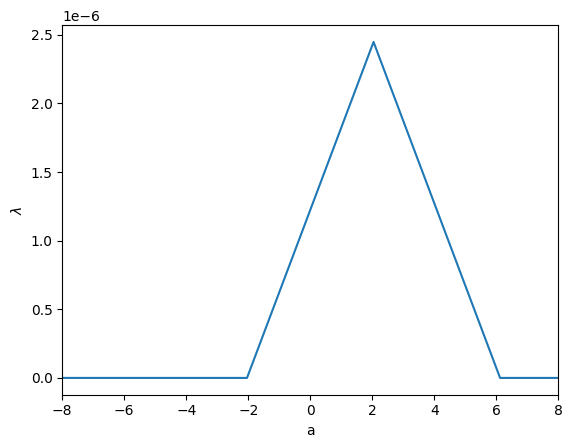

In [64]:
import numpy as np
import matplotlib.pyplot as plt


def prob_dens(x,l,a):
    return np.sqrt(l/np.pi)*np.exp(-l*(x-a)**2)

num = np.linspace(-100,100)
l = 4*np.pi
a = 1
min_y = min(prob_dens(num,l,a)) 

#Plot
fig, ax = plt.subplots()
ax.plot(num,prob_dens(num,l,a))
ax.set_xlabel('a')
ax.set_ylabel(r'$\lambda$')
ax.set_xlim(-8,8)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True,symmetric=True)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.5e-6))



